In [1]:
from pyspark.sql import SparkSession
from pyspark import  SparkContext
import os
import pandas as pd

/tmp/ipykernel_31916/2081191832.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
spark = SparkSession.builder.master("yarn").getOrCreate()

/spark/bin/load-spark-env.sh: line 68: ps: command not found


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/21 03:33:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/03/21 03:34:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/03/21 03:34:01 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [3]:
import pandas as pd

# Sample data for Purchases table
purchases_data = {
    'user_id': [11, 15, 17, 12, 8, 1, 10, 13],
    'purchase_date': ['2023-11-07', '2023-11-30', '2023-11-14', '2023-11-24', '2023-11-03', '2023-11-16', '2023-11-12', '2023-11-24'],
    'amount_spend': [1126, 7473, 2414, 9692, 5117, 5241, 8266, 12000]
}

# Create DataFrame for Purchases
purchases_df = pd.DataFrame(purchases_data)

# Display the DataFrame
print("Purchases table:")
print(purchases_df)


df_person = spark.createDataFrame(purchases_df)
df_person.createOrReplaceTempView("Purchases")



Purchases table:
   user_id purchase_date  amount_spend
0       11    2023-11-07          1126
1       15    2023-11-30          7473
2       17    2023-11-14          2414
3       12    2023-11-24          9692
4        8    2023-11-03          5117
5        1    2023-11-16          5241
6       10    2023-11-12          8266
7       13    2023-11-24         12000


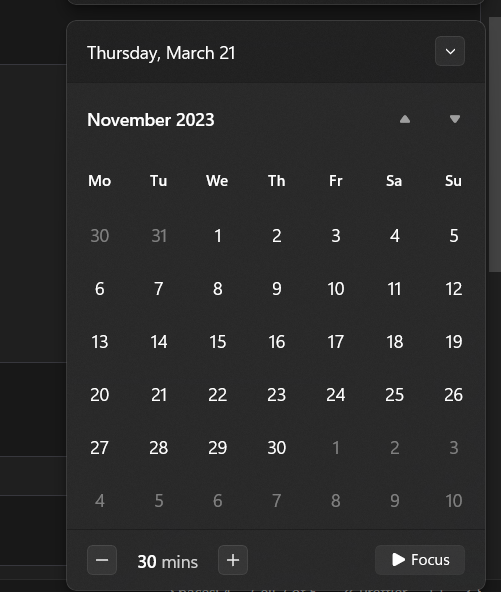

In [10]:
query = """
    with t as  (
        select '2023-11-03' as day, 1 as week
        union all
        select '2023-11-10' as day, 2 as week
        union all
        select '2023-11-17' as day, 3 as week
        union all
        select '2023-11-24' as day, 4 as week
    )
    
    select
        t.day,
        t.week,
        sum(ifnull(p.amount_spend, 0)) as total_amount
    from t left join Purchases p on t.day = p.purchase_date
    group by t.day, t.week
"""

In [11]:
spark.sql(query).show()

+----------+----+------------+
|       day|week|total_amount|
+----------+----+------------+
|2023-11-10|   2|           0|
|2023-11-24|   4|       21692|
|2023-11-03|   1|        5117|
|2023-11-17|   3|           0|
+----------+----+------------+

